
# Project: Data Wrangling of WeRateDogs Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Data Gathering</a></li>
<li><a href="#eda">Data Assessment</a></li>
<li><a href="#eda">Data Wrangling and Cleaning</a></li>
<li><a href="#eda">Data Analysis and Visualization</a></li>
<li><a href="#conclusions">Summary and Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Datasets Description 

>  This project work contains datasets of twitter user @dog_rates, also known as 'WeRateDogs'. This is a twitter handle \that rates people's dogs with a humorous comment about the dog. @dog_rates datasets used in this data analysis contains tweet data of over 5000+ which were obtained from three sources; downloaded flatfile (CSV), and culled data from the internet and data obtained directly from twitter API. The aim of this data analysis work is to gather these data from its sources, evaluate and assess these datasets visually and programmatically for its quality and tidiness, clean and tidy the data, analyse and visualize content of the data in a written report. 

**Some of the data analysis project questions to be answered:** 
- Explore the distribution of dog mean ratings
- Explore the relationship between the dogs names and retweet counts
- Explore the relationship between display_text_range for dogs' tweet and its favorite count over a period of time


In [196]:
# import packages for data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests 
import os
import json

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

<a id='wrangling'></a>
## Data Gathering

- Import dataset from downloaded flat file
- Programmatically download dataset from the Internet using Requests library
- Query WeRateDogs twitter archive data using Twitter API or more appropriately use the given file 

##### Gather Data 1:  from CSV file

In [197]:
#import dataset from downloaded CSV flatfile 
df1 = pd.read_csv(r'C:\Users\omoni\OneDrive - The University of Manchester\Huawei Laptop\DS_ML_AI\ALT-X\Project 2\Submission\twitter-archive-enhanced.csv')
df1.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
31,886258384151887873,NaN,NaN,2017-07-15 16:17:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Waffles. His doggles are pupside down....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886258384...,13,10,Waffles,None,None,None,None


##### Gather Data 2:  Download data from Internet source file

In [198]:
# Extract the dataset from internet source

folder_name = 'C:\\Users\\omoni\\OneDrive - The University of Manchester\\Huawei Laptop\\DS_ML_AI\\ALT-X\\Project 2\\Submission'

if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
df2 = pd.read_csv(r'C:\Users\omoni\OneDrive - The University of Manchester\Huawei Laptop\DS_ML_AI\ALT-X\Project 2\Submission\image-predictions.tsv', sep='\t')
df2.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


##### Gather Data 3:  Query Twitter data

In [199]:

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [200]:
#Query the twitter archive data of WeRateDogs using Tweepy (Twitter API) (actually obtained data from Tweet Json txt file) 

folder_name = r'C:\Users\omoni\OneDrive - The University of Manchester\Huawei Laptop\DS_ML_AI\ALT-X\Project 2\Submission'

if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)
with open(os.path.join(folder_name,url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
    
with open(r'C:\Users\omoni\OneDrive - The University of Manchester\Huawei Laptop\DS_ML_AI\ALT-X\Project 2\Submission\tweet-json.txt','r') as file:
    lines = file.readlines()

data = [ ]

for line in lines:
    data.append(json.loads(line))

df3 = pd.DataFrame(data)
df3.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN


>**Observation**: There are three tweet datasets gathered from CSV flat file, internet download sources and twitter web-querying. These data values have been assigned to df1 (Twitter_archive), df2(image_prediction), df3(queried twitter data) dataframes respectively. In other to assess and clean the entire datasets, it would be necessary to document issues with the dataset visually and programmatically. This would be done in the next segment of the analysis


### Data Assessment 
> In this section, visual and programmatic assessments of each of the datasets are conducted to detect and document 10 data quality and 3 tidiness issues. After which data issues are cleaned in the following order: completeness issues, structural issues and content issues. 

In [201]:
df1.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1998,672538107540070400,NaN,NaN,2015-12-03 22:09:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Darby. He's a Fiscal Tutankhamen Waxbeard...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672538107...,7,10,Darby,None,None,None,None
643,793195938047070209,NaN,NaN,2016-10-31 21:00:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lily. She's pupset that her costu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793195938...,12,10,Lily,None,None,None,puppo
2304,666983947667116034,NaN,NaN,2015-11-18 14:18:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a curly Ticonderoga named Pepe. No fee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666983947...,11,10,a,None,None,None,None


#### Visual Assessment

- df1: Many features with NaN values (in_reply_to_status_id	in_reply_to_user_id,retweeted_status_id	retweeted_status_user_id..etc) (data quality issue - invalid)
- df2: p1,p2,p3 column with mixture of uppercase and lower case values (data quality issue - inconsistent)
- df3: Presence of retweets (data quality issue - invalid)
- df1: timestamp contains multiple time-related data variables (data quality issue - invalid)
- df3: created_at contains multiple time-related data variables (data quality issue - invalid)
- df1: dog stage names not well structured/merged (data tidness issue - poor structure)
- df3: id_str column duplicated similar to id column (data tidness- poor structure)
- df3: id column name need to be changed to tweet_id in conformity with other datasets (data tidness - poor structure))

#### Programmatic Assessment 

- df1: name column contains mixture of uppercase and lower case values (data quality issue - inconsistent)
- df3: id_str column should be int not object (data quality - inconsistent)
- df1: some dog names are wrongly extracted(data quality - inaccurate)
- df1: some dog rating numerator rating are wrongly extracted(data quality - inaccurate)
- df3: display_text_range column contains two variables start and end of text character (data tidness issue - poor structure)

In [202]:
#duplicate dataframe
df1_c = df1.copy()
df2_c = df2.copy()
df3_c = df3.copy()

##### Define: Presence of null values in dataframes (data quality cleaning 1) - df1

In [203]:
#Code
#Data quality cleaning - df1
#drop all columns with 'null' values
df1_c.dropna(axis=1, inplace=True)
df2_c.dropna(axis=1, inplace=True)
df3_c.dropna(axis=1, inplace=True)

In [204]:
#test
#df1_c.sample(3)

##### Define: timestamp is an object (wrong format) not datetime (data quality cleaning 2) - df1_c

In [205]:
#Code
#Data quality cleaning - df1
#convert the timestamp to datatime  
df1_c['timestamp'] = pd.to_datetime(df1_c['timestamp'])
df1_c['tweet_year'] = df1_c['timestamp'].dt.year
df1_c['tweet_month'] = df1_c['timestamp'].dt.month_name(locale = 'English')
df1_c['tweet_day'] = df1_c['timestamp'].dt.day_name()
df1_c.drop(['timestamp'], axis=1, inplace=True)

In [206]:
#test
#df1_c.sample(3)

##### Define: Multiple time variables in rows (data quality cleaning 3) - df3_c

In [207]:
#Code
#Data tidness cleaning - (df3)
#adjust the date time in 'created_at fetaure' and categorize into tweet_year, tweet_month and tweet_day
df3_c['tweet_year'] = df3_c['created_at'].apply(lambda x: x[-4:])
df3_c['tweet_day'] = df3_c['created_at'].apply(lambda x: x[0:3])
df3_c['tweet_month'] = df3_c['created_at'].apply(lambda x: x[4:7])
df3_c.drop(['created_at'], axis=1, inplace=True)
df3_c['tweet_year'] = df3_c['tweet_year'].astype(int)

In [208]:
#test
#df3_c.sample(3)

##### Define: duplicated id_str column (data tidness cleaning 1) - df3_c

In [209]:
#Code
#Data tidness cleaning -(df3)
#drop id_str column
df3_c.drop(['id_str'], axis=1, inplace=True)

In [210]:
#test
#df3_c.sample(3)

##### Define: Multiple data variables in 'display_text_range' column (data tidness cleaning 2) - df3_c

In [211]:
#Code
#Data tidness cleaning - invalid display test range value in df3
#extract test range and convert to int

for count, row in enumerate(df3_c['display_text_range']):
    df3_c.at[count, 'display_text_range'] = int(row[1]) - int(row[0])

df3_c['display_text_range'] = df3_c['display_text_range'].astype(int)

In [212]:
#test
#df3_c.sample(3)

##### Define: Presence of retweeted rows(observations) (data quality cleaning 4) - df1_c

In [213]:
#Code
#Data quality cleaning - remove invalid retweets rows in df1
#Find 'RT' keywords in each observation and remove row accordingly.

df1_c = df1_c[df1_c['text'].str.contains('RT @')==False]

In [214]:
#test
#df1_c.sample(3)

##### Define: Presence of retweeted rows(observations) (data quality cleaning 5) - df3_c

In [215]:
#Code
#Data quality cleaning - remove invalid retweets rows in df3
#Find 'RT' keywords in each observation and remove row accordingly.

df3_c = df3_c[df3_c['full_text'].str.contains('RT @')== False]

In [216]:
#test
#df3_c.sample(3)

##### Define: Change id to tweet_id for conformity (data tidness cleaning 3) - df3_c

In [217]:
#Code
#Data tidness cleaning - Rename the column of 'id' to 'tweet_id'
df3_c.rename(columns={'id':'tweet_id'}, inplace=True)

In [218]:
#test
#df3_c.sample(3)

##### Define: Inconsistent data capitalization in p1,p2,p3 (data quality cleaning 6) - df2_c

In [219]:
#Code
#Data quality cleaning - convert all values of features (p1, p2, p3) to lowercase in df1 for uniformity
df2_c['p1'] = df2_c['p1'].str.title()
df2_c['p2'] = df2_c['p2'].str.title()
df2_c['p3'] = df2_c['p3'].str.title()
#for df1
df1_c['name'] = df1_c['name'].str.title()

In [220]:
#test
#df2_c.sample(3)

In [221]:
#Create a new feaure for dog score rating
df1_c['mean_rating'] = df1_c['rating_numerator']/df1_c['rating_denominator']

##### Define:  inaccurate name  in df1_c (data quality cleaning 7) - df1_c

In [222]:
#Code
# Data quality cleaning - replace dog name 'A' with 'None'
df1_c['name'] = df1_c['name'].apply(lambda x : 'None' if x == 'A' else x)

In [223]:
#Code
# Data quality cleaning -  replace dog name 'Sadie' with 'Sadie and Daisy'
df1_c['name'] = df1_c['name'].apply(lambda x : 'Sadie and Daisy' if x == 'Sadie' else x)

In [224]:
#Code
# Data quality cleaning - replace dog name 'Maddie' with 'Maddie and Gunner'
df1_c['name'] = df1_c['name'].apply(lambda x : 'Maddie and Gunner' if x == 'Maddie' else x)

In [225]:
#test
#df1_c.sample(3)

##### Define: Poor dog_type structure (data tidness cleaning 4) - df3_c

In [226]:
#Code
#Data tidness cleaning - arranging the dog type into one column 
df1_c.reset_index(inplace=True, drop=True)
df1_c['dog_type'] = 'None'

dog_list = list(df1_c['dog_type'])

keywords = ['doggo','floofer','pupper','puppo']

#collate all dog type values that are not 'None
for key in keywords:
    for i in range(df1_c.shape[0]):
        if df1_c.at[i, key] != 'None':
            dog_list[i] = key
            
#append list to dataframe             
df1_c['dog_type'] = dog_list

In [227]:
#test
#df1_c.sample(3)

##### Define: General cleaning of all datasets (data quality cleaning 8) - df3_c

In [228]:
#Code
#drop all doggo, floofer, pupper, puppo features
df1_c.drop(['doggo', 'floofer', 'pupper', 'puppo','text','source','rating_numerator','rating_denominator'], axis=1, inplace=True)

In [229]:
#Code
#drop all unnecessary features
df3_c.drop(['truncated', 'entities', 'source','full_text','user'], axis=1, inplace=True)

In [230]:
#Code
#drop all unnecessary features
df2_c.drop(['jpg_url','img_num'], axis=1, inplace=True)

In [231]:
#Code
#Data Tidness cleaning - reset index for df1_c, df2_c and df3_c
df1_c.reset_index(inplace=True, drop=True)
df2_c.reset_index(inplace=True, drop=True)
df3_c.reset_index(inplace=True, drop=True)

In [232]:
#test
#df1_c.sample(3)
#df2_c.sample(3)
#df3_c.sample(3)

##### Merge all datasets on tweet_id

In [233]:
#Merge all datasets on the tweet_id
df_merged = df1_c.merge(df2_c, on='tweet_id')

In [234]:
df = df_merged.merge(df3_c, on='tweet_id')

In [235]:
#further cleaning of the dataframe
#drop repeated columns
df.drop(['tweet_year_y', 'tweet_day_y', 'tweet_month_y', 'retweeted'], axis=1, inplace=True)
#rename columns
df.rename(columns={'tweet_year_x':'tweet_year', 'tweet_month_x':'tweet_month', 'tweet_day_x':'tweet_day'}, inplace=True)

In [236]:
df.sample(3)

,tweet_id,name,tweet_year,tweet_month,tweet_day,mean_rating,dog_type,p1,p1_conf,p1_dog,...,p2_dog,p3,p3_conf,p3_dog,display_text_range,is_quote_status,retweet_count,favorite_count,favorited,lang
1622,672988786805112832,Schnozz,2015,December,Saturday,1.0,pupper,Lakeland_Terrier,0.836632,True,...,True,Wire-Haired_Fox_Terrier,0.038160,True,130,False,314,1039,False,en
562,776113305656188928,Sampson,2016,September,Wednesday,1.1,pupper,Mousetrap,0.777468,False,...,False,Paddlewheel,0.017492,False,92,False,5068,13102,False,en
230,836001077879255040,None,2017,February,Sunday,1.3,None,Samoyed,0.963558,True,...,False,Malamute,0.005904,True,122,False,4935,20924,False,en


>**Observation**: The three data sets which originally had issues relating to low quality of data values and poor tidness has been trimmed and cleaned by means of visual and programmaitc assessments techniques. The merged datasets which now represents the master data set that would be use for the EDA aspect of the project in the next section. Nevetheless, future work would entail data cleaning and wrangling so as to improve the overall quality of the data set.

##### Store cleaned dataset

In [237]:
 df.to_csv('modified_WeRateDogs.csv', index=False)

## Analyse Cleaned Dataset

### Research Question 2  - Tweet timeline distribution

In [238]:
#Understanding the numerical statistics of the dataset
df.describe()

,tweet_id,tweet_year,mean_rating,p1_conf,p2_conf,p3_conf,display_text_range,retweet_count,favorite_count
count,1.994000e+03,1994.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03,1994.000000,1994.000000,1994.000000
mean,7.358508e+17,2015.846540,1.169249,0.593941,1.344195e-01,6.024848e-02,111.522568,2766.753260,8895.725677
std,6.747816e+16,0.698734,4.067071,0.271954,1.006807e-01,5.089067e-02,26.493668,4674.698447,12213.193181
min,6.660209e+17,2015.000000,0.000000,0.044333,1.011300e-08,1.740170e-10,13.000000,16.000000,81.000000
25%,6.758475e+17,2015.000000,1.000000,0.362857,5.393987e-02,1.619283e-02,94.000000,624.750000,1982.000000
50%,7.084748e+17,2016.000000,1.100000,0.587635,1.174550e-01,4.950530e-02,116.000000,1359.500000,4136.000000
75%,7.877873e+17,2016.000000,1.200000,0.846285,1.951377e-01,9.159438e-02,137.000000,3220.000000,11308.000000
max,8.924206e+17,2017.000000,177.600000,1.000000,4.880140e-01,2.734190e-01,148.000000,79515.000000,132810.000000


In [239]:
#order the tweet_year periods of the dataset
index_day = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']
ordered_classes = pd.api.types.CategoricalDtype(ordered=True, categories=index_day)
df['tweet_day'] = df['tweet_day'].astype(ordered_classes)

In [240]:
#order the tweet_month periods of the dataset
index_month = ['January','February', 'March', 'April','May','June','July','August','September','October','November','December']
ordered_classes = pd.api.types.CategoricalDtype(ordered=True, categories=index_month)
df['tweet_month'] = df['tweet_month'].astype(ordered_classes)

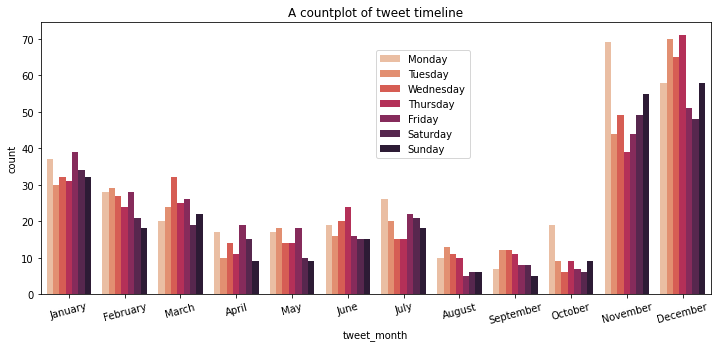

In [241]:
#plot a countplot of month and day tweets - Understanding the categorical statistics of number of tweets in 2015-2017 time period
plt.figure(figsize=[12,5])
sns.countplot(data=df, x='tweet_month', hue='tweet_day', palette='rocket_r')
plt.xticks(rotation=15);
plt.legend(loc=[0.5,0.5])
plt.title('A countplot of tweet timeline');

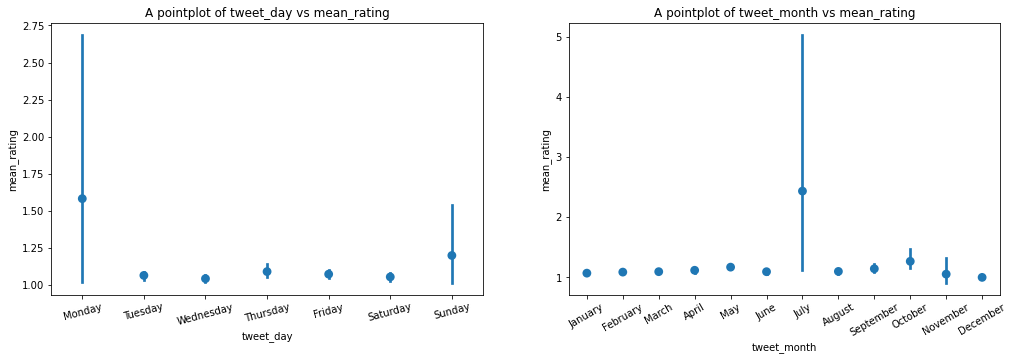

In [242]:
#Plot the point plot distribution of mean ratings across each day and month
plt.figure(figsize=[17,5])
plt.subplot(1,2,1)
sns.pointplot(data=df, x='tweet_day', y='mean_rating', linestyles="")
plt.xticks(rotation=15);
plt.title('A pointplot of tweet_day vs mean_rating');

plt.subplot(1,2,2)
sns.pointplot(data=df, x='tweet_month', y='mean_rating', linestyles="")
plt.xticks(rotation=30);
plt.title('A pointplot of tweet_month vs mean_rating');

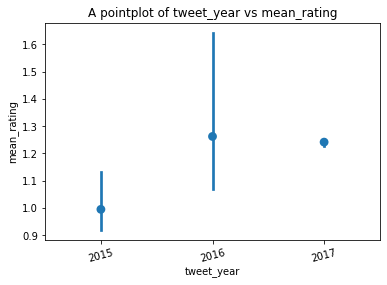

In [243]:
#plot a pointplot of tweet year vs mean rating 
sns.pointplot(data=df, x='tweet_year', y='mean_rating', linestyles="")
plt.xticks(rotation=15);
plt.title('A pointplot of tweet_year vs mean_rating');

>**Observation**: Based on the visualization plots illustrated above, Tweets on dog rates are usually issued on Mondays for week days and more commonly in December of a year. It is also observed that the latter and early part of the year shows high dog rates tweets. Generally high mean dog ratings are usually given in the month of July, while 2016 and 2017 shows an high increase in dog rate mean rating. This may be as a result of an increase in dog rate tweet popularity.

### Research Question 2  - Impact of display_text_range on tweet ratings 

In [244]:
df['display_text_range'].describe()

count    1994.000000
mean      111.522568
std        26.493668
min        13.000000
25%        94.000000
50%       116.000000
75%       137.000000
max       148.000000
Name: display_text_range, dtype: float64

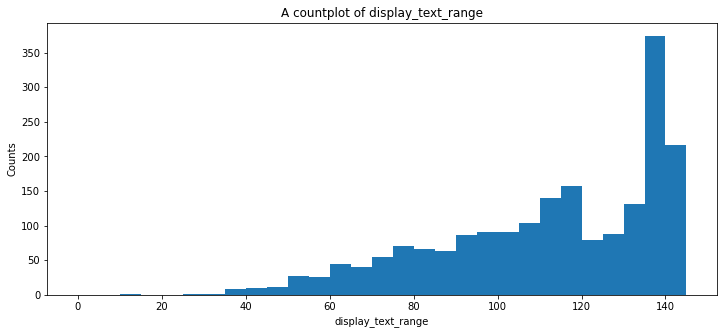

In [245]:
#Use matplotlib hist plot function to explore the display text range distribution

plt.figure(figsize=[12,5])
bins = np.arange(0,df['display_text_range'].max()+1.1,5)
plt.hist(data=df, x='display_text_range', bins=bins);
plt.xlabel('display_text_range');
plt.ylabel('Counts');
plt.title('A countplot of display_text_range');

In [246]:
df['mean_rating'].describe()

count    1994.000000
mean        1.169249
std         4.067071
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: mean_rating, dtype: float64

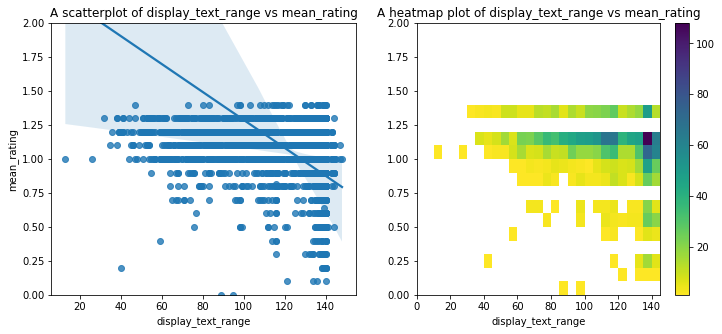

In [247]:
#The use of scatterplot and heatmap to explore the display text range  vs mean ratings distribution
plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
sns.regplot(data=df, x='display_text_range', y='mean_rating');
plt.ylim((0,2))
plt.title('A scatterplot of display_text_range vs mean_rating');

plt.subplot(1,2,2)
bins_x = np.arange(0, 148+1.1, 5)
bins_y = np.arange(0, 2.6+0.1, 0.1)
plt.hist2d(data=df, x='display_text_range', y='mean_rating', cmin=0.5, cmap='viridis_r', bins=[bins_x, bins_y]);
plt.ylim((0,2))
plt.colorbar()
plt.xlabel('display_text_range')
plt.title('A heatmap plot of display_text_range vs mean_rating');

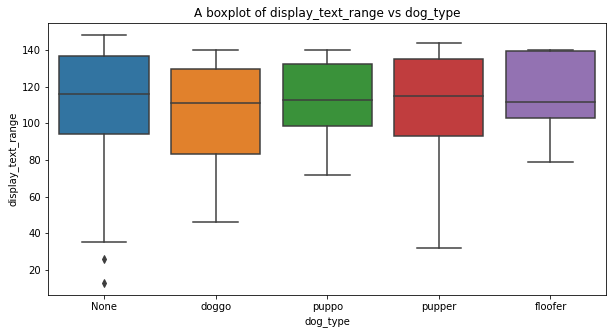

In [248]:
#boxplot of dog_type group vs display_text_range
plt.figure(figsize=[10,5])
sns.boxplot(data=df, x='dog_type', y='display_text_range');
plt.title('A boxplot of display_text_range vs dog_type');

>**Observation**: Results shows that 75% of display_text_range is about 137 characters. Furthermore, it is not quite clear how mean dog ratings are affected by length of display_text_range. However, is a very minor tendencies that the longer the display text chat the less the mean dog rating. The heatmap plot show that many of the distant_text_range characters fall between 130-137 for a peak mean rating of 1.13-1.20. Based on the box plot above, the median population of the dog types are almost the same, however, display_text_range with pupper dog types have a little bit higher number of characters than other dog types apart from 'None'.   

### Research Question 3  - Impact of dog_type on tweet ratings

In [249]:
# random sampling of dataset
df.sample(3)

,tweet_id,name,tweet_year,tweet_month,tweet_day,mean_rating,dog_type,p1,p1_conf,p1_dog,...,p2_dog,p3,p3_conf,p3_dog,display_text_range,is_quote_status,retweet_count,favorite_count,favorited,lang
332,819006400881917954,Sunny,2017,January,Wednesday,1.4,doggo,Prison,0.907083,False,...,False,Umbrella,0.007850,False,97,False,21794,49960,False,en
87,871879754684805121,Lassie,2017,June,Tuesday,1.3,None,Shetland_Sheepdog,0.969171,True,...,True,Pomeranian,0.008515,True,136,False,11918,39090,False,en
1687,671536543010570240,Reginald,2015,December,Tuesday,0.9,None,Pug,0.537652,True,...,True,French_Bulldog,0.068296,True,130,False,441,1253,False,en


In [250]:
df['dog_type'].value_counts()

None       1688
pupper      212
doggo        63
puppo        23
floofer       8
Name: dog_type, dtype: int64

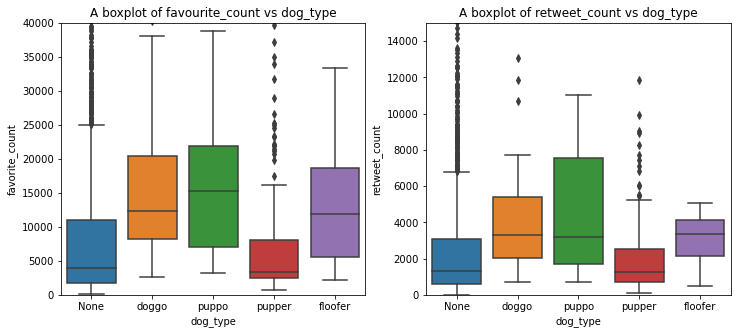

In [251]:
# A plot of favourite count vs dog type and retweet_count vs dog_type
plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
sns.boxplot(data=df, x='dog_type', y='favorite_count');
plt.ylim((0,40000))
plt.title('A boxplot of favourite_count vs dog_type');

plt.subplot(1,2,2)
sns.boxplot(data=df, x='dog_type', y='retweet_count');
plt.ylim((0,15000))
plt.title('A boxplot of retweet_count vs dog_type');

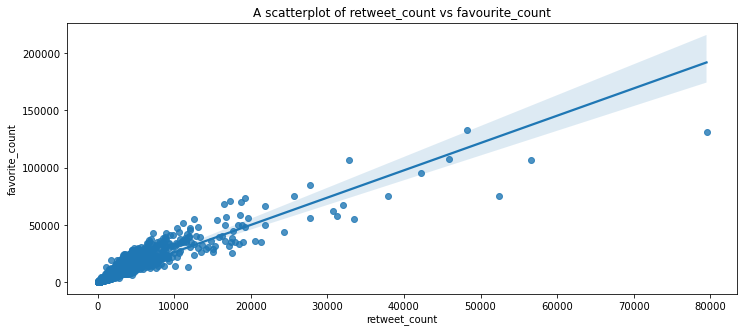

In [252]:
#plot of retweet count vs favourite count
plt.figure(figsize=[12,5])
sns.regplot(data=df, x='retweet_count', y='favorite_count');
plt.title('A scatterplot of retweet_count vs favourite_count');

>**Observation**: Results from the plot above shows that generally puppo dog type have a higher favorite count than other dog types while tweets with doggo and puppo have the highest retweet ratings. From the above favorite_count vs retweet count plot indicates a postive linear plot distribution. 

<a id='conclusions'></a>
## Conclusions

**Limitation**:
- Data analysis done in project is based on the level of data cleaning and data assessment done prior before exploration. Also the dataset are not well balanced across all features and observations. Future work entails proper data assessment, feature engineering and more data collation  

**Summary**: 
- The favourite_count and retweet_counts are positively, linearly correlated. Generally, based on this data analysed, puppo dog_types tweets tend to get more favourite counts than others. While doggo and puppo dog types tweets have the highest median  retweeted counts.

- There is a slight negative correlation between display text chat range and mean dog rating assigned

- Many of the distant_text_range characters for a tweet falls between 130-137 for a peak mean rating of 1.13-1.20. With about  75% of display_text_range of tweets at 137 characters.

- Tweets on dog rates are usually issued on Mondays for week days and more commonly in December of a year. It is also observed that the latter and early part of the year shows high dog rates tweets.  

- Tweets from the year 2016 and 2017 shows an high increase in dog rate mean rating. This may be as a result of an increase in dog rate tweet popularity.

In [68]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295